In [27]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_train, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2640 - accuracy: 0.9243
Epoch 2/3
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1097 - accuracy: 0.9656
Epoch 3/3
60000/60000 [==============================] - 3s 47us/sample - loss: 0.0754 - accuracy: 0.9762


In [30]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

ValueError: Input arrays should have the same number of samples as target arrays. Found 60000 input samples and 10000 target samples.

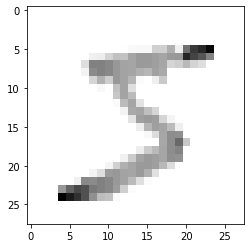

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [26]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()
print(x_train[0])

In [31]:
model.save('numreader')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: numreader\assets


In [33]:
new_model = tf.keras.models.load_model('numreader')

In [34]:
predictions = new_model.predict([x_test])

In [35]:
print(predictions)

[[1.18732126e-08 8.63440073e-06 2.12243026e-06 ... 1.51166125e-06
  1.55426694e-08 1.58929799e-06]
 [9.99802649e-01 7.94334909e-08 1.87733836e-04 ... 2.34008141e-07
  2.23777405e-08 2.46770060e-06]
 [1.09075145e-10 2.56467342e-06 3.81430378e-04 ... 1.50411521e-04
  7.84507620e-07 7.18575666e-06]
 ...
 [1.87839383e-10 2.05234563e-09 1.42803590e-11 ... 1.04405226e-11
  9.29859123e-09 9.52446783e-07]
 [7.24368510e-05 6.70909822e-06 1.07214255e-05 ... 5.39234406e-07
  1.98706693e-05 2.09785227e-07]
 [5.79280953e-04 4.60859837e-07 1.06887150e-04 ... 3.27032240e-06
  9.99126732e-01 1.42236837e-04]]


In [36]:
import numpy as np

print(np.argmax(predictions[0]))

5


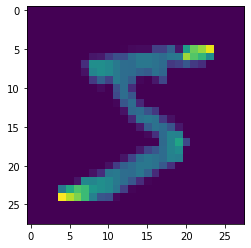

In [37]:
plt.imshow(x_test[0])
plt.show()